##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Regression: predict iron ore concentrate

# In a *regression* problem, we aim to predict the output of a continuous value, like a price or a probability. Contrast this with a *classification* problem, where we aim to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

# This notebook uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. To do this, we'll provide the model with a description of many automobiles from that time period. This description includes attributes like: cylinders, displacement, horsepower, and weight.

# This example uses the `tf.keras` API, see [this guide](https://www.tensorflow.org/guide/keras) for details.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Gráficos do matplotlib interativos
%matplotlib notebook

### Get the data

In [3]:
pasta = 'Marco/'
raw_input = pd.read_excel(pasta + '02c-teste_sec_ag_normalizados.xlsx', header=0)
raw_target = pd.read_excel(pasta + 'T_Conceicao.xlsx', header=0)

In [4]:
dataset = pd.concat([raw_input, raw_target.iloc[:,1]], axis=1)
dataset

,Nível,Densidade,Vazão Volumétrica,Vazão mássica,Vazão amina,Vazão amido,Nível.1,Densidade.1,Vazão Volumétrica.1,Vazão mássica.1,...,Abertura válvula dardo 2.3,Nível de espuma.6,Vazão de ar.5,Abertura válvula dardo 1.3,Abertura válvula dardo 2.4,Nível de espuma.7,Nível de espuma.8,Nível de espuma.9,Vazão de ar.6,Ferro
0,0.718993,0.749039,0.947167,0.901141,0.702683,0.513671,0.787101,0.209393,0.805939,0.218106,...,0.057704,0.138392,0.017235,0.002356,0.004925,0.090863,0.297345,0.131213,0.687222,69.250000
1,0.576177,0.757196,0.969316,0.901286,0.703755,0.513900,0.706378,0.202693,0.805939,0.211591,...,0.072844,0.136935,0.017235,0.003546,0.010619,0.123631,0.453487,0.131213,0.675619,69.360001
2,0.542977,0.772186,0.915583,0.896016,0.699016,0.500820,0.711488,0.206521,0.809299,0.215089,...,0.069625,0.139895,0.016465,0.003827,0.006235,0.120809,0.456606,0.131213,0.681338,68.980003
3,0.510579,0.774904,0.881231,0.855401,0.662482,0.405109,0.607978,0.202197,0.801549,0.209456,...,0.066405,0.138432,0.015581,0.003599,0.010676,0.122175,0.365350,0.136808,0.693793,69.029999
4,0.396400,0.772344,0.797755,0.856188,0.668116,0.401051,0.833148,0.213759,0.806730,0.224922,...,0.065914,0.138099,0.012991,0.003743,0.011813,0.093390,0.312222,0.151838,0.695831,68.760002
5,0.518919,0.729007,0.796336,0.842994,0.653675,0.373435,0.816165,0.225736,0.801664,0.240402,...,0.074683,0.156569,0.016364,0.002364,0.006486,0.111285,0.489329,0.141672,0.706361,68.889999
6,0.663640,0.713663,0.797700,0.809545,0.625024,0.381613,0.788009,0.231776,0.792929,0.246937,...,0.073592,0.235685,0.012732,0.003454,0.005632,0.081499,0.592583,0.130148,0.699063,68.639999
7,0.630515,0.737620,0.863816,0.806995,0.631846,0.389948,0.788935,0.236645,0.788144,0.256117,...,0.075172,0.304879,0.009976,0.003454,0.005632,0.080417,0.589167,0.131708,0.683156,69.290001
8,0.247339,0.589324,0.837702,0.559895,0.284733,0.297185,0.450250,0.234486,0.769498,0.249517,...,0.075745,0.205896,0.012551,0.003454,0.005632,0.113763,0.506106,0.136590,0.672222,68.910004
9,0.314636,0.726474,0.897330,0.807792,0.607740,0.419047,0.248429,0.187426,0.765430,0.187656,...,0.071164,0.182115,0.016878,0.004544,0.004778,0.122577,0.494591,0.132160,0.653002,69.330002


### Clean the data

The dataset contains a few unknown values.

In [5]:
dataset['Nível'].isna().sum()

0

To keep this initial tutorial simple drop those rows.

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.head()

### Split the data into train and test

Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [ ]:
train_dataset = dataset.sample(frac=0.7)
test_dataset = dataset.drop(train_dataset.index)

### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

In [ ]:
#sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
sns.pairplot(dataset, diag_kind="kde")
plt.show()

Also look at the overall statistics:

In [6]:
#train_stats = train_dataset.describe()
train_stats = dataset.describe()
train_stats.pop('Ferro')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Nível,359.0,0.468178,0.208837,0.0,0.315757,0.492444,0.612370,1.0
Densidade,359.0,0.722902,0.131325,0.0,0.681160,0.735859,0.806062,1.0
Vazão Volumétrica,359.0,0.711250,0.142394,0.0,0.621091,0.700451,0.814647,1.0
Vazão mássica,359.0,0.787167,0.161410,0.0,0.773128,0.854804,0.880649,1.0
Vazão amina,359.0,0.660998,0.185003,0.0,0.602504,0.715496,0.776895,1.0
Vazão amido,359.0,0.483298,0.149617,0.0,0.382759,0.461684,0.598340,1.0
Nível.1,359.0,0.400446,0.295335,0.0,0.115004,0.289140,0.741903,1.0
Densidade.1,359.0,0.296425,0.111017,0.0,0.230399,0.268980,0.329798,1.0
Vazão Volumétrica.1,359.0,0.513743,0.181488,0.0,0.377862,0.493228,0.676643,1.0
Vazão mássica.1,359.0,0.270559,0.093378,0.0,0.221635,0.246043,0.297480,1.0


<IPython.core.display.Javascript object>


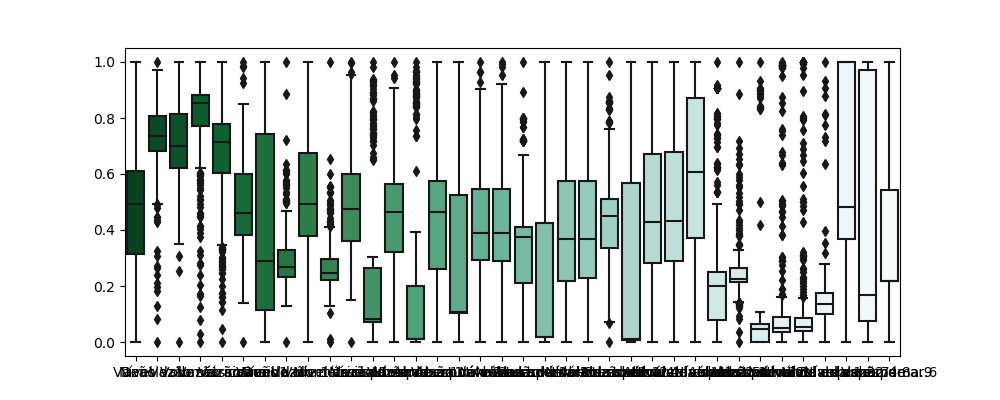

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(10,4))
#axes.boxplot(dados)
#train_dataset.boxplot()

sns.boxplot(data=dataset.drop(columns='Ferro'), palette="BuGn_r")
#sns.boxplot(data=dataset, palette="BuGn_r")

### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [ ]:
train_labels = train_dataset.pop('Ferro')
test_labels = test_dataset.pop('Ferro')

### Normalize the data

Look again at the `train_stats` block above and note how different the ranges of each feature are.

It is good practice to normalize features that use different scales and ranges. Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [ ]:
def norm(x):
  return (x - train_stats['min']) / (train_stats['max'] - train_stats['min'])

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_dataset = pd.DataFrame(index=dataset.index)
for parametro in dataset.drop(columns='Ferro').columns:
    param = (dataset[parametro] - train_stats['min'].loc[parametro]) / (train_stats['max'].loc[parametro] - 
                                                                        train_stats['min'].loc[parametro])
    normed_dataset = pd.concat([normed_dataset, param], axis = 1)

This normalized data is what we will use to train the model.

Caution: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.  That includes the test set as well as live data when the model is used in production.

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(14,8))
#axes.boxplot(dados)
#train_dataset.boxplot()
sns.boxplot(data=normed_dataset, palette="BuGn_r")

<IPython.core.display.Javascript object>


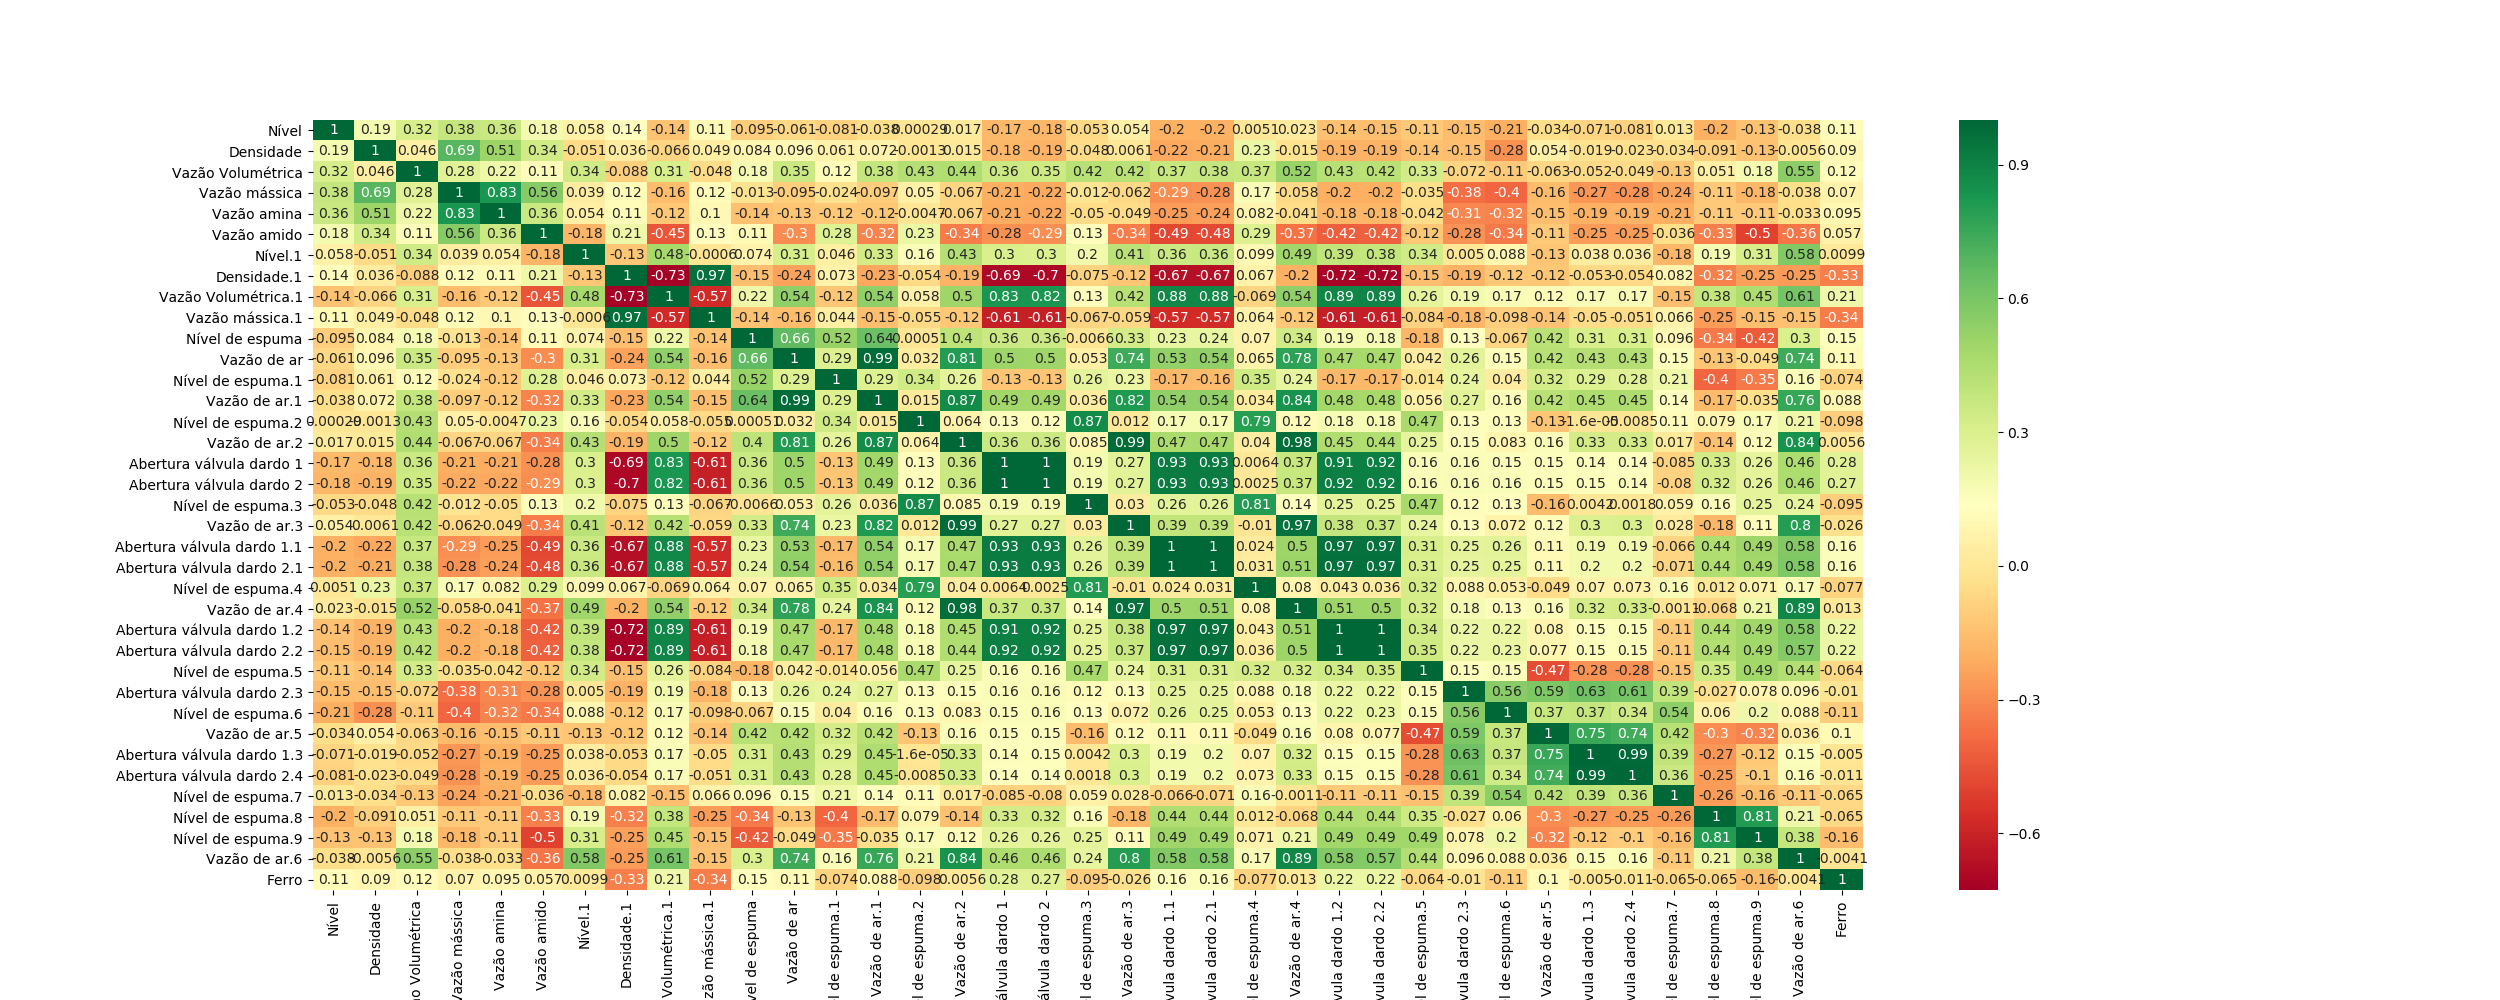

In [14]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,10))
g = sns.heatmap(dataset[top_corr_features].corr(), annot=True,cmap="RdYlGn")

In [ ]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,1.5))
g = sns.heatmap(dataset[top_corr_features].corr().iloc[-1:,:-1], annot=True,cmap="RdYlGn")

In [ ]:
ax = sns.pairplot(dataset, y_vars=dataset.columns[-1], x_vars=dataset.columns[:-1], kind='reg')
ax

## Conclusion

This notebook introduced a few techniques to handle a regression problem.

* Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
* Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
* When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
* If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
* Early stopping is a useful technique to prevent overfitting.

In [ ]:
normed_dataset.to_excel(pasta + '1c-teste_inicial_ag_normalizados.xlsx', 'Planilha1', index=False)